In [0]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

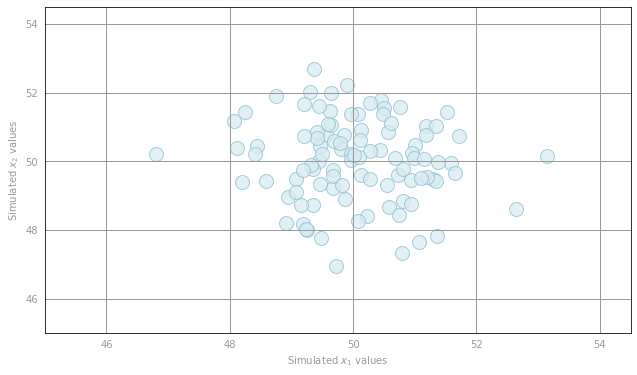

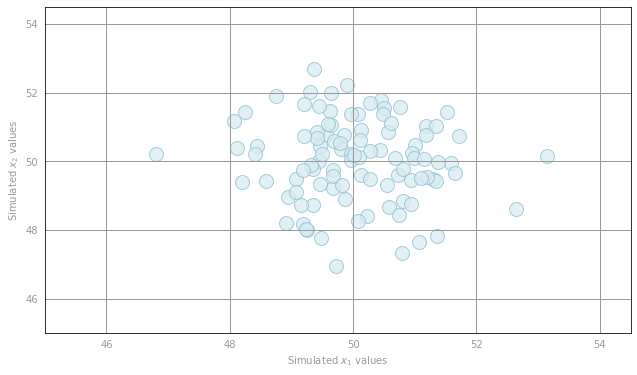

In [0]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45, 54.5), ax.set_ylim(45, 54.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
display(fig)

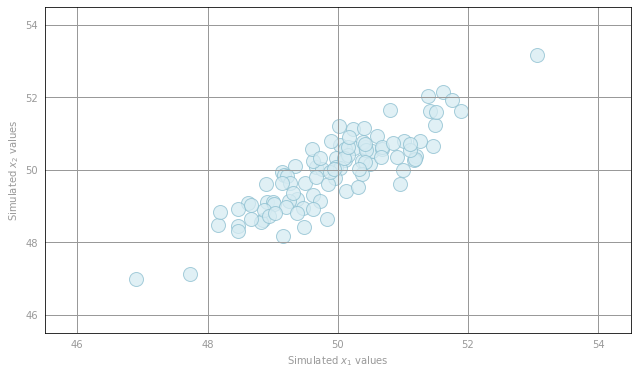

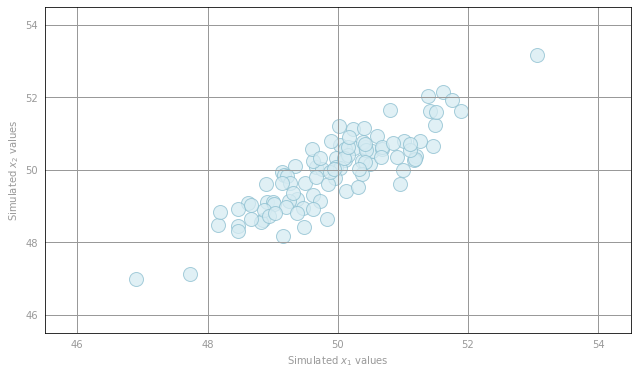

In [0]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5), ax.set_ylim(45.5, 54.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#d6ebf2',
            edgecolors='#8cbfd0', alpha=0.75)
display(fig)

In [0]:
# TODO: Replace <FILL IN> with appropriate code
correlated_data = sc.parallelize(data_correlated)

#mean_correlated = <FILL IN>
mean_correlated = correlated_data.mean()
#correlated_data_zero_mean = correlated_data.<FILL IN>
correlated_data_zero_mean = correlated_data.map(lambda x: x-mean_correlated)

print (mean_correlated)
print (correlated_data.take(1))
print (correlated_data_zero_mean.take(1))

[49.95739037 49.97180477]
[array([49.6717712 , 50.07531969])]
[array([-0.28561917,  0.10351492])]


In [0]:
%pip install databricks-test-helper

Python interpreter will be restarted.
  Created wheel for databricks-test-helper: filename=databricks_test_helper-1.0.0-py3-none-any.whl size=2075 sha256=aef0ad37c39ebd5984c1b290a150192a7e022424b60bc8d88f1f6191173c6ce7
  Stored in directory: /root/.cache/pip/wheels/df/38/e1/6676b8272f6f2f81a10f04b08171f0110eda77caf22cb5bfac
Successfully built databricks-test-helper
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-18ea9bab-1eb5-42e3-99be-8669e2b7105a/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
pip install --upgrade databricks_test_helper

Python interpreter will be restarted.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-18ea9bab-1eb5-42e3-99be-8669e2b7105a/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.


In [0]:
# TEST Interpreting PCA (1a)
from databricks_test_helper.test_helper import Test
Test.assertTrue(np.allclose(mean_correlated, [49.95739037, 49.97180477]),
                'incorrect value for mean_correlated')
Test.assertTrue(np.allclose(correlated_data_zero_mean.take(1)[0], [-0.28561917, 0.10351492]),
                'incorrect value for correlated_data_zero_mean')

---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
<command-4013317401847737> in <module>
      1 # TEST Interpreting PCA (1a)
----> 2 from databricks_test_helper.test_helper import Test
      3 Test.assertTrue(np.allclose(mean_correlated, [49.95739037, 49.97180477]),
      4                 'incorrect value for mean_correlated')
      5 Test.assertTrue(np.allclose(correlated_data_zero_mean.take(1)[0], [-0.28561917, 0.10351492]),

/databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch(name, globals, locals, fromlist, level)
    160             # Import the desired module. If you’re seeing this while debugging a failed import,
    161             # look at preceding stack frames for relevant error information.
--> 162             original_result = python_builtin_import(name, globals, locals, fromlist, level)
    163 
    164             is_root

In [0]:
# TODO: Replace <FILL IN> with appropriate code
# Compute the covariance matrix using outer products and correlated_data_zero_mean
#correlated_cov = <FILL IN>
num_data_points = correlated_data_zero_mean.count()
print num_data_points
correlated_cov = correlated_data_zero_mean.map(lambda x: np.outer(x, x)).sum()/num_data_points  
print correlated_cov

#Calculate correlated_cov by using correlated_data_zero_mean and applying a map with lambda and numpy outer then summing and finally dividing by #num_data_points

  File "<command-4013317401847739>", line 5
    print num_data_points
          ^
SyntaxError: Missing parentheses in call to 'print'. Did you mean print(num_data_points)?


In [0]:
# TEST Sample covariance matrix (1b)
cov_result = [[ 0.99558386,  0.90148989], [0.90148989, 1.08607497]]
Test.assertTrue(np.allclose(cov_result, correlated_cov), 'incorrect value for correlated_cov')

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-4013317401847740> in <module>
      1 # TEST Sample covariance matrix (1b)
      2 cov_result = [[ 0.99558386,  0.90148989], [0.90148989, 1.08607497]]
----> 3 Test.assertTrue(np.allclose(cov_result, correlated_cov), 'incorrect value for correlated_cov')

NameError: name 'Test' is not defined